In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Adding a global pooling layer to reduce feature dimensions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Assuming `base_model` is your loaded pretrained model without top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # This layer will average out the spatial dimensions
model = Model(inputs=base_model.input, outputs=x)

# Now `model` will output 2D features instead of 4D

# Prepare your data generators
data_gen = ImageDataGenerator(rescale=1./255)
generator = data_gen.flow_from_directory(
    '/Users/krishna/Semester2/GWAR/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for feature extraction: keeps data in order
)

# Extract features
features = model.predict(generator, steps=len(generator))

Found 6160 images belonging to 6 classes.
193/193 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step


In [9]:
labels = generator.classes


In [5]:
features = model.predict(generator, steps=len(generator))


193/193 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step


In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming 'features' are extracted using a pre-trained model and 'generator.classes' holds the labels
X_train, X_test, y_train, y_test = train_test_split(features, generator.classes, test_size=0.2, random_state=42)

# Initialize and train the SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Evaluate the model
svm_score = svm.score(X_test, y_test)
print("SVM accuracy:", svm_score)


SVM accuracy: 0.9926948051948052


In [3]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Add a global pooling layer to reduce feature dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)
feature_model = Model(inputs=base_model.input, outputs=x)

# Setup data generator
data_gen = ImageDataGenerator(rescale=1./255)
generator = data_gen.flow_from_directory(
    '/Users/krishna/Semester2/GWAR/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for feature extraction: keeps data in order
)

# Extract features
features = feature_model.predict(generator, steps=len(generator))
labels = np.argmax(generator.labels, axis=1)  # Modify this line if your labels are not one-hot encoded

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


Found 6160 images belonging to 6 classes.
193/193 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step


AxisError: axis 1 is out of bounds for array of dimension 1

Accuracy: 0.9926948051948052
Precision: 0.9905497613341772
Recall: 0.9776717119596375
F1-Score: 0.9838868799076105


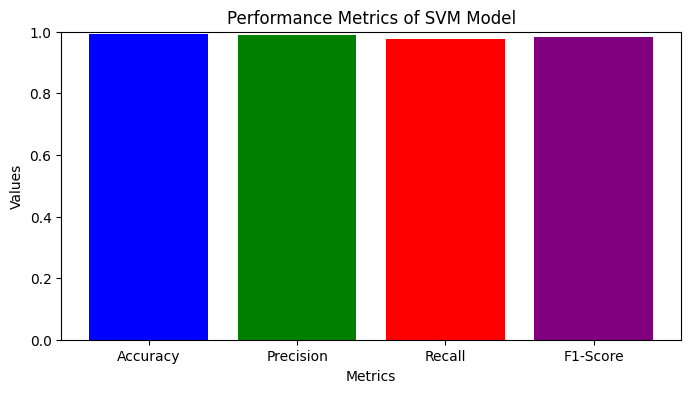

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features' are your extracted CNN features and 'labels' are the corresponding labels
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = svm.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the metrics in a bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 4))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics of SVM Model')
plt.ylim(0, 1)  # Ensuring the y-axis starts at 0 and ends at 1 for clarity
plt.show()

